In [7]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
%matplotlib inline

5


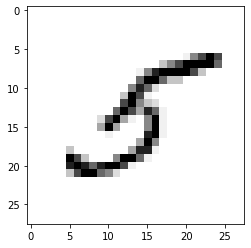

In [9]:
import matplotlib.pyplot as plt

image_index = 35
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

In [10]:
print(x_train.shape[0])
print(x_test.shape)
print(y_train[0])

60000
(10000, 28, 28)
5


In [11]:
print(y_train[image_index])

5


In [12]:
# save input image dimensions
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train / 255
x_test = x_test / 255




In [13]:
from keras.utils import to_categorical
num_classes = 10

y_train_one_hot = to_categorical(y_train,num_classes)
y_test_one_hot = to_categorical(y_test,num_classes)

print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
     activation='relu',
     input_shape=(img_rows, img_cols, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [15]:
model.compile(loss='sparse_categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy'])

In [20]:
batch_size = 128
epochs = 10

hist = model.fit(x_train, y_train,
          epochs=epochs,
          validation_data=(x_test, y_test)
         )
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save("test_model.h5")

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0767 - accuracy: 0.9765 - val_loss: 0.0307 - val_accuracy: 0.9907
Epoch 2/10
60000/60000 [==============================] - 177s 3ms/step - loss: 0.0601 - accuracy: 0.9819 - val_loss: 0.0346 - val_accuracy: 0.9886
Epoch 3/10
60000/60000 [==============================] - 169s 3ms/step - loss: 0.0480 - accuracy: 0.9851 - val_loss: 0.0317 - val_accuracy: 0.9899
Epoch 4/10
60000/60000 [==============================] - 164s 3ms/step - loss: 0.0431 - accuracy: 0.9871 - val_loss: 0.0321 - val_accuracy: 0.9903
Epoch 5/10
60000/60000 [==============================] - 181s 3ms/step - loss: 0.0355 - accuracy: 0.9889 - val_loss: 0.0317 - val_accuracy: 0.9903
Epoch 6/10
60000/60000 [==============================] - 184s 3ms/step - loss: 0.0322 - accuracy: 0.9901 - val_loss: 0.0305 - val_accuracy: 0.9910
Epoch 7/10
60000/60000 [==============================] - 188s

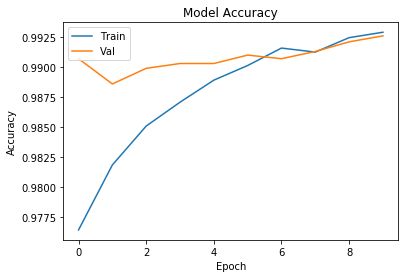

In [21]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()